In [13]:
# coding: utf-8
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import requests
import time
%matplotlib inline
matplotlib.style.use('ggplot')

# sleep to avoid DOS attack, unfortunately wasn't enough and I have been blacklisted from the website
# Allow to fetch the datas from the website and to create HTML files
# I did chose the 6 first parties but for the whole Czech Republic 
def fetchDatas():

	ODS = requests.get('https://volby.cz/pls/ps2017/ps111?xjazyk=EN&xkraj=0&xstrana=1&xv=1&xt=2')
	ODS = ODS.text
	Html_file= open("ODS","w")
	Html_file.write(ODS)
	Html_file.close()
	time.sleep(10)

	ANO = requests.get('http://volby.cz/pls/ps2017/ps111?xjazyk=EN&xkraj=0&xstrana=21&xv=1&xt=2')
	ANO = ANO.text
	Html_file= open("ANO","w")
	Html_file.write(ANO)
	Html_file.close()
	print("success")
	time.sleep(10)

	CSSD = requests.get('http://volby.cz/pls/ps2017/ps111?xjazyk=EN&xkraj=0&xstrana=4&xv=1&xt=2')
	CSSD = CSSD.text
	Html_file= open("CSSD","w") 
	Html_file.write(CSSD)
	Html_file.close()
	print("success")
	time.sleep(10)

	KDUCSL = requests.get('http://volby.cz/pls/ps2017/ps111?xjazyk=EN&xkraj=0&xstrana=24&xv=1&xt=2')
	KDUCSL = KDUCSL.text
	Html_file= open("KDUCSL","w")
	Html_file.write(KDUCSL)
	Html_file.close()
	time.sleep(10)

	TOP9 = requests.get('http://volby.cz/pls/ps2017/ps111?xjazyk=EN&xkraj=0&xstrana=20&xv=1&xt=2')
	TOP9 = TOP9.text
	Html_file= open("TOP9","w")
	Html_file.write(TOP9)
	Html_file.close()
	time.sleep(10)

	STAN = requests.get('http://volby.cz/pls/ps2017/ps111?xjazyk=EN&xkraj=0&xstrana=7&xv=1&xt=2')
	STAN = STAN.text
	Html_file= open("STAN","w")
	Html_file.write(STAN)
	Html_file.close()
	time.sleep(10)

In [14]:
def createDataFrames():

	dataFrames = []

	file = open("ANO.html",'r')
	ANO = pd.read_html(file,flavor='html5lib',header=None)
	file.close()
	dataFrames.append(ANO)

	file = open("CSSD.html",'r')
	CSSD = pd.read_html(file,flavor='html5lib',header=None)

	file.close()
	dataFrames.append(CSSD)

	file = open("KDUCSL.html",'r')
	KDUCSL = pd.read_html(file,flavor='html5lib',header=None)

	file.close()
	dataFrames.append(KDUCSL)

	file = open("ODS.html",'r')
	ODS = pd.read_html(file,flavor='html5lib',header=None)

	file.close()
	dataFrames.append(ODS)

	file = open("STAN.html",'r')
	STAN = pd.read_html(file,flavor='html5lib',header=None)

	file.close()
	dataFrames.append(STAN)

	file = open("TOP9.html",'r')
	TOP9 = pd.read_html(file,flavor='html5lib',header=None)

	file.close()
	dataFrames.append(TOP9)

	return dataFrames

In [15]:
def processDataFrames(dataFrames):
	appendedData = []
	for df in dataFrames:
		appendedData.append(df[0])
	finalDF = pd.concat(appendedData)
	finalDF.columns = ['regionNumber','regionName','serialNumber','name','age','party','partyMember','noVotes','perVotes','seat','ranking']
	finalDF.drop(finalDF.index[[0,1]],inplace=True)
	finalDF['age'] = pd.to_numeric(finalDF['age']) 
	finalDF['ranking'] = pd.to_numeric(finalDF['ranking'],errors='coerce') 

	return finalDF


In [18]:
def ploting(data):


	data.boxplot(column='age',by='party')

	# I create 3 arbitrary categories to distinguish youngs ( < 30 ), middle aged people ( > 30 and < 60 )
    # and olds ( > 60) 
	youngs = data[data['age']<30]
	youngs = youngs.groupby(['party']).count()
	youngs['ageCategory'] = 'youngs'
	middleAged = data[(data['age'] > 30) & (data['age'] <60)]
	middleAged = middleAged.groupby(['party']).count()
	middleAged['ageCategory'] = 'middleAged'
	olds = data[data['age'] > 60 ]
	olds = olds.groupby(['party']).count()
	olds['ageCategory'] = 'olds'
	ageDF = pd.concat([youngs,middleAged,olds])
	ageDF.drop(ageDF.columns[[1,2,3,4,5,6,7,8,9]], axis=1, inplace=True)
	ageDF.columns = ['Number of candidates','ageCategory']
	display(ageDF)
	ageDF.pivot_table(index='party', columns='ageCategory', values='Number of candidates').plot.bar(rot=0, stacked=True)
	plt.show()

	return


,Number of candidates,ageCategory
party,,
ANO,10,youngs
CSSD,14,youngs
KDU-CSL,20,youngs
ODS,17,youngs
STAN,3,youngs
TOP 09,27,youngs
ANO,277,middleAged
CSSD,268,middleAged
KDU-CSL,257,middleAged


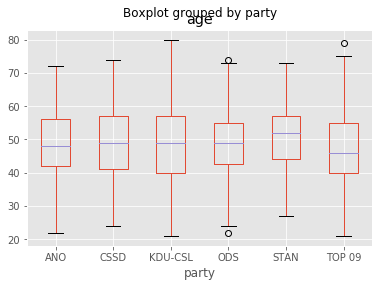

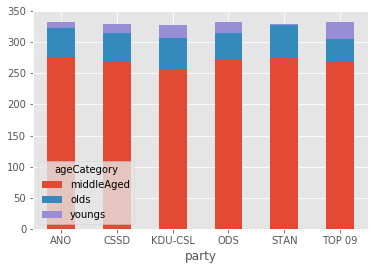

In [20]:
def main():

	pd.set_option('display.max_rows', 500)
	dataFrames = createDataFrames()
	finalDF = processDataFrames(dataFrames)
	# print(finalDF.info())
	# print(finalDF.describe())
	ploting(finalDF)

if __name__ == "__main__": main()

    
# We can see that, obviously not so many candidates are youngs and most of them are middle aged.
# We can't see a real difference between the parties, they seem to all
# respect this pattern. 
# However we can see that the STAN party seems to have more old candidates and less young ones that all the others,
# unlike the KDU-CSL which has more young candidates and less old ones. (Even though They have the oldest candidate)